In [12]:
import sys
import pandas as pd
sys.path.append('../') 
import matplotlib.pyplot as plt
import seaborn as sns

# Import necessary functions
from src.loader import load_data
from src.clean import clean_data
# Load data
# Define the correct SQL query
sql_query =  """
SELECT * FROM xdr_data;
"""
df = load_data(sql_query)


In [13]:
# apply the cleaning function
df = clean_data(df)

In [14]:
# Count the number of sessions per user
sessions_frequency = df.groupby('MSISDN/Number')['Bearer Id'].count().reset_index(name='Sessions Frequency')


In [15]:
# Sum the duration of all sessions per user
sessions_duration = df.groupby('MSISDN/Number')['Dur. (ms)'].sum().reset_index(name='Total Duration (ms)')


In [16]:
# Sum the download and upload traffic per user
df['Total Traffic (Bytes)'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']
sessions_total_traffic = df.groupby('MSISDN/Number')['Total Traffic (Bytes)'].sum().reset_index(name='Total Traffic (Bytes)')


In [17]:
import pandas as pd
# Merge the three metrics into a single DataFrame
user_engagement = pd.merge(sessions_frequency, sessions_duration, on='MSISDN/Number')
user_engagement = pd.merge(user_engagement, sessions_total_traffic, on='MSISDN/Number')


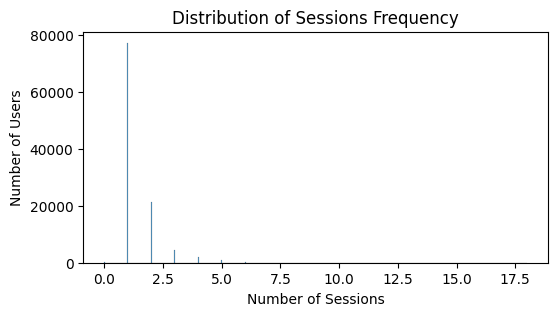

In [18]:
# Histogram of Sessions Frequency
plt.figure(figsize=(6, 3))
sns.histplot(user_engagement['Sessions Frequency'])
plt.title('Distribution of Sessions Frequency')
plt.xlabel('Number of Sessions')
plt.ylabel('Number of Users')
plt.show()



The histogram of session frequency shows that the vast majority of users engage in a very small number of sessions, indicative of a user base with low to moderate engagement. A right-skewed distribution points to the presence of a few users with significantly higher session frequencies, which may represent power users or require further investigation to rule out data anomalies.

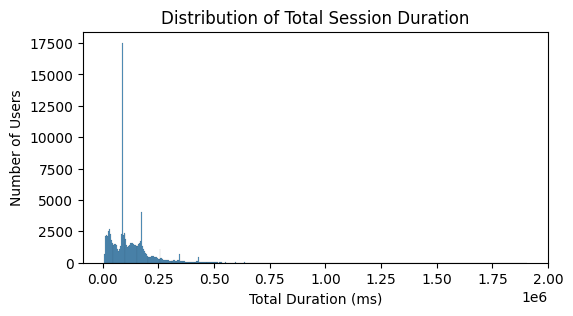

In [21]:
# Histogram of Total Duration
plt.figure(figsize=(6, 3))
sns.histplot(user_engagement['Total Duration (ms)'])
plt.title('Distribution of Total Session Duration')
plt.xlabel('Total Duration (ms)')
plt.ylabel('Number of Users')
plt.show()


The histogram for total session duration displays a pronounced peak at the lower end, suggesting that most users tend to have shorter session durations. Similar to session frequency, the distribution is right-skewed, indicating that a smaller portion of the user base experiences much longer session durations, possibly highlighting a dedicated or more engaged subset of users.

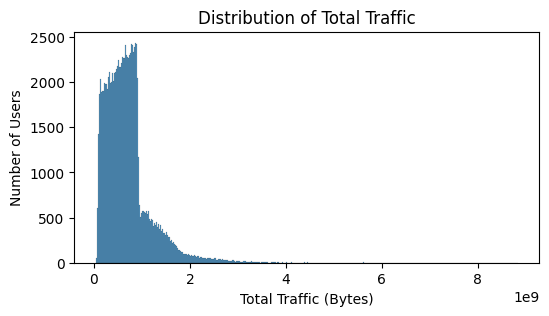

In [22]:

# Histogram of Total Traffic
plt.figure(figsize=(6, 3))
sns.histplot(user_engagement['Total Traffic (Bytes)'])
plt.title('Distribution of Total Traffic')
plt.xlabel('Total Traffic (Bytes)')
plt.ylabel('Number of Users')
plt.show()

The histogram for total traffic shows a heavy concentration of users with low data usage, declining sharply as data usage increases. This suggests that most users are light to moderate data consumers, with a small fraction consuming a significantly larger amount of data. The distribution's long tail towards the higher end highlights the presence of outliers or heavy users within the network.